In [ ]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
#import statsmodels.formula.api as smf
#import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.cm as cm

## for explainer
#from lime import lime_tabular

In [ ]:
# This dataset contains information to compute the target, as a function of several parameters
iris = datasets.load_iris()

In [ ]:
x = iris.data  # we only take the first two features.
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
targets = iris.target_names
n_targets = len(targets)
features = iris.feature_names
n_features = len(features)

<ipython-input-6-f5beae9b4afb>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


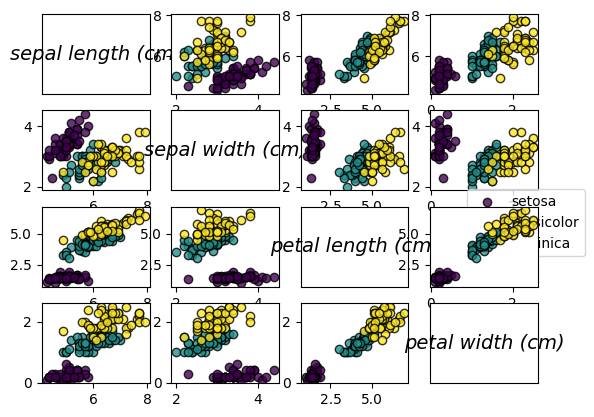

In [ ]:
# Plot pairs of variables
cmap = cm.get_cmap('viridis')
fig, axs = plt.subplots(n_features, n_features)

for i in range(n_features):
    for j in range(n_features):
        if i != j:
            for k in range(n_targets):
                axs[i, j].scatter(x[y==k,j], x[y==k,i], label = targets[k], color = cmap(k/(n_targets-1)),
                                  alpha=0.8, edgecolor='k')
        else:
            axs[i, j].text(0.5, 0.5, features[i], horizontalalignment='center',
                           verticalalignment='center', style='italic', fontsize=14)
            axs[i, j].xaxis.set_visible(False)
            axs[i, j].yaxis.set_visible(False)


axs[n_features//2 - 1, n_features-1].legend(bbox_to_anchor=(1.5, 0.1))
plt.subplots_adjust(right=0.90)
plt.show()

In [ ]:
# Train SVM classifier with all the available observations
clf = SVC(kernel = 'linear')
clf.fit(x, y)

# Predict one new sample
print("New evaluations", targets[clf.predict([
    [4.4, 2.9, 1.4, 0.2],
    [0.4,0.1,0.1,0.4],
    [7.7, 3.0, 6.1, 2.2],
    [5.3, 2.9, 3.2, 1.3],
    [4.8, 3.8, 2.8, 0.8],
    [6.5, 4.1, 6.1, 2.3],
    [5.3, 3, 2, 0.2],
    [5, 4, 3, 2],
    [6.2, 2.5, 1.9, 2.4],
    [5.4, 3, 4.5, 1.5]
    ])])


New evaluations ['setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor']


## Normalization


In this other pice of code, the scaling is performed by suing a Normalization.  

Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision

In [ ]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_norm = scaler.transform(x)
# print(x_norm)

In [ ]:
# Splitting the data into train and test split (70/30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## Artificial Neural Network

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score

# 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle = True)

acc = 0
recall = np.array([0., 0., 0.])
precision = np.array([0., 0., 0.])

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'linear')
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    # Calculate confusion matrix and model performance
    # Concatenate results of evaluation
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    # Model performance
    # Confussion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Performance scores
    acc += accuracy_score(y_test, y_pred)
    recall += recall_score(y_test, y_pred, average = None)
    precision += precision_score(y_test, y_pred, average = None)

print(classification_report(y_test, y_pred))
#print('Confusion matrix\n', cm)

# Print results
acc = acc/5
print('Acc: ', acc)

precision = precision/5
print('Precision: ', precision)

recall = recall/5
print('Recall: ', recall)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Acc:  1.9600000000000002
Precision:  [2.  2.  1.9]
Recall:  [2.   1.88 2.  ]


## Using a KNN algorithm

In [ ]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

# Predict y data with classifier:
y_predict = classifier.predict(X_test)

# Print results:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 0 0]
 [0 5 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

